# Tarea 1

### Importando librerías 

In [1]:
import os
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
import skimage.transform
from skimage.util import random_noise
from skimage import filters,exposure

## 1. Elabore un programa en Python que permita hacer lo siguiente:

a) Leer una imagen en niveles de gris de disco duro de cualquier tamaño y desplegarla en pantalla.

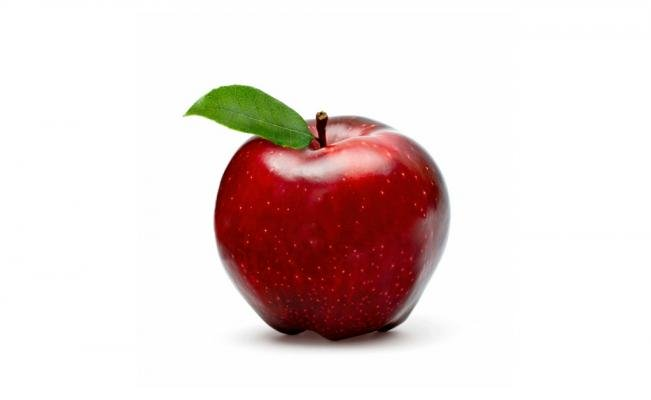

In [2]:
manzana = os.path.join("./recursos/manzana.jpg")
mzna = Image.open(manzana)
mzna

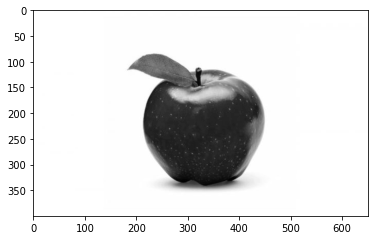

In [3]:
mzna = mzna.convert('L')#Leer sólo luminosidad
amz=np.array(mzna)#Se convierte a un arreglo
plt.imshow(amz,cmap='gray')#Se grafica el arreglo
plt.show()

Dims originales: (400, 651)
Dims con w a 100 pixeles (61, 100)


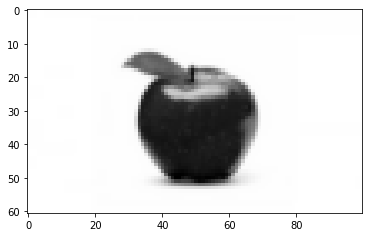

In [4]:
#Reducir el array para reducir el consumo:
#img=ski.transform.downscale_local_mean(amz,(4,4))#Escalar
sz=amz.shape
w=100 #Se define el nuevo ancho de la imagen
print('Dims originales:',sz)
sz=(int(w/sz[1]*sz[0]),w)
print('Dims con w a', w, 'pixeles',sz)
img=ski.transform.resize(amz,sz) #Se crea una nueva imagen escalada a 100 pixeles
plt.imshow(img,cmap='gray')
plt.show()

b) Calcular el histograma de la imagen de acuerdo a lo visto en el conjunto de láminas 3 del curso. 
Mostrar histograma en pantalla.

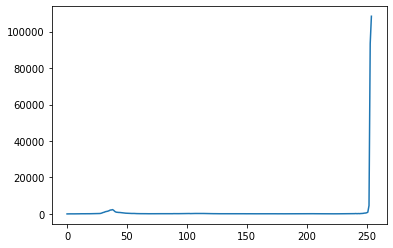

In [5]:
histo,bins=np.histogram(amz.reshape(-1),bins=255)
plt.plot(histo)
plt.show()

c) Agregar ruido de algún tipo (uniformemente distribuido, gaussiano o sal y pimienta) a la imagen, de acuerdo a lo visto en el conjunto de láminas 3 del curso.
Mostrar el resultado en pantalla.

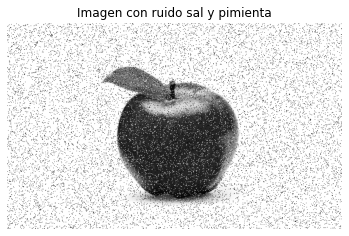

In [6]:
ruidoSalyPimienta = random_noise(amz, mode='s&p', amount=0.12)
plt.imshow(ruidoSalyPimienta,cmap='gray') #Se grafica el arreglo
plt.title('Imagen con ruido sal y pimienta')
plt.axis('off')
plt.show()

d) Aplicar un filtro a la imagen ruidosa, como filtros puede ser el filtro promedio aritmético, gaussiano, mediano y alfa-T, de acuerdo a lo visto en los conjuntos de láminas 3 y 4 del curso.
Mostrar resultado en pantalla.

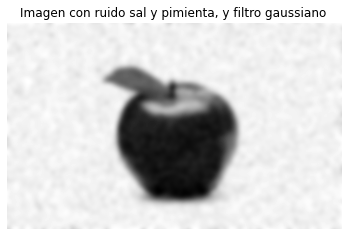

In [7]:
filtroGaussiano = filters.gaussian(ruidoSalyPimienta, sigma=5)
plt.imshow(filtroGaussiano,cmap='gray') #Se grafica el arreglo
plt.title('Imagen con ruido sal y pimienta, y filtro gaussiano ')
plt.axis('off')
plt.show()

e) Cambiar el contraste de la imagen obtenida en a) y el histograma obtenido en b) al aplicar la teoría vista en la presentación 4 del curso.
Mostrar resultado en pantalla.

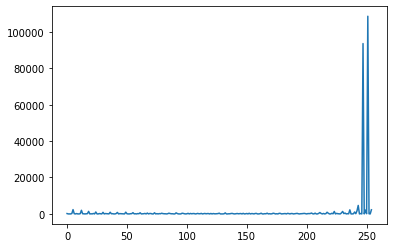

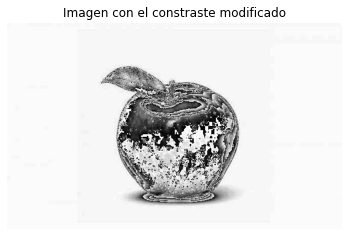

In [8]:
logarithmic_corrected = exposure.adjust_log(amz, 5)
histo,bins=np.histogram(logarithmic_corrected,bins=255)
plt.plot(histo)
plt.show()
plt.imshow(logarithmic_corrected,cmap='gray') #Se grafica el arreglo
plt.title('Imagen con el constraste modificado')
plt.axis('off')
plt.show()

## 2. Agregue al programa elaborado en el punto 1, las siguientes funcionalidades 

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

a) Leer una imagen binaria de disco duro y desplegarla en pantalla.

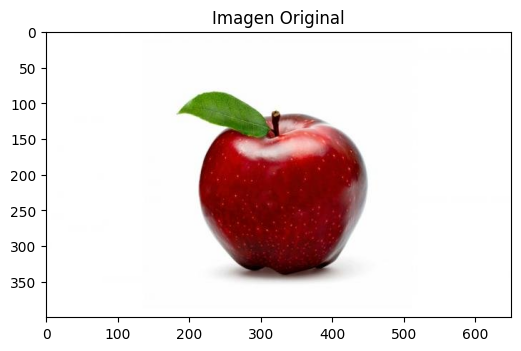

In [11]:
img = cv2.imread('./recursos/manzana.jpg') #Lee en BGR con la libreria opencv
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convertimos de BGR a RGB para leer bien la imagen a color

plt.figure(dpi=100)
plt.title('Imagen Original')
plt.imshow(img_rgb)
plt.show()

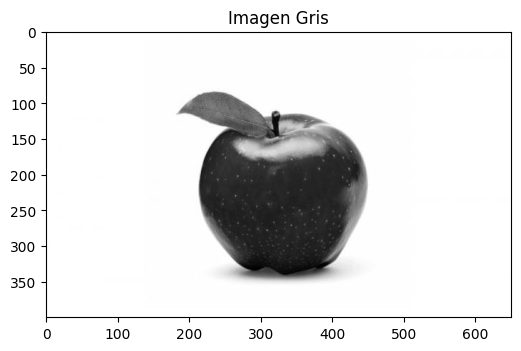

In [12]:
#Converción a gris
img_gris = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY) #Hacemos conversion de espacio de color a gris

#GRAFICANDO
plt.figure(dpi=100)
plt.title('Imagen Gris')
plt.imshow(img_gris,cmap='gray')
plt.show()


b) Erosionar las regiones conectadas en la imagen y mostrar el resultado. Aplicar lo visto en el conjunto de láminas 4.
Mostar resultado en pantalla.

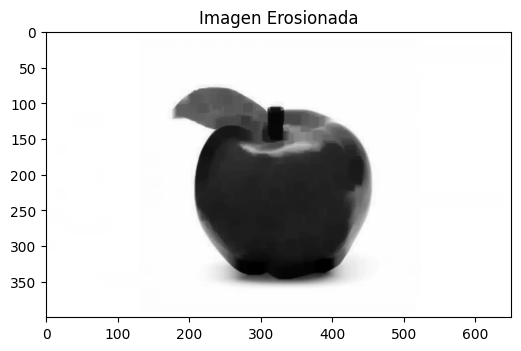

In [13]:
kernel = np.ones((7,7),np.uint8)
erosion = cv2.erode(img_gris,kernel,iterations = 2)

#GRAFICANDO
plt.figure(dpi=100)
plt.title('Imagen Erosionada')
plt.imshow(erosion,cmap='gray')
plt.show()

c) Dilatar las regiones conectadas en la imagen y mostrar el resultado. Aplicar lo visto en el conjunto de láminas 4.
Mostar resultado en pantalla.

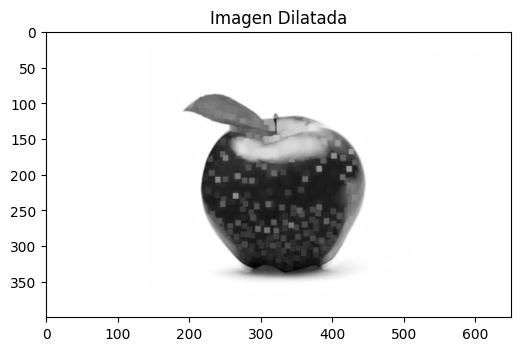

In [14]:
dilatacion = cv2.dilate(img_gris,kernel,iterations = 1)
#GRAFICANDO
plt.figure(dpi=100)
plt.title('Imagen Dilatada')
plt.imshow(dilatacion,cmap='gray')
plt.show()

d) Abrir las regiones en la imagen y mostrar el resultado. Aplicar lo visto en el conjunto de láminas 4.
Mostar resultado en pantalla.

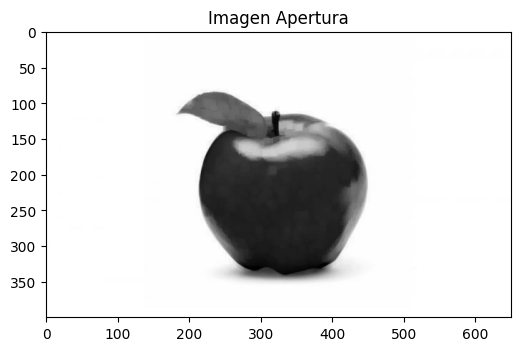

In [15]:
apertura = cv2.morphologyEx(img_gris, cv2.MORPH_OPEN, kernel)
#GRAFICANDO
plt.figure(dpi=100)
plt.title('Imagen Apertura')
plt.imshow(apertura,cmap='gray')
plt.show()

e) Cerrar las regiones en la imagen y mostrar el resultado. Aplicar lo visto en el conjunto de láminas 4.
Mostar resultado en pantalla.

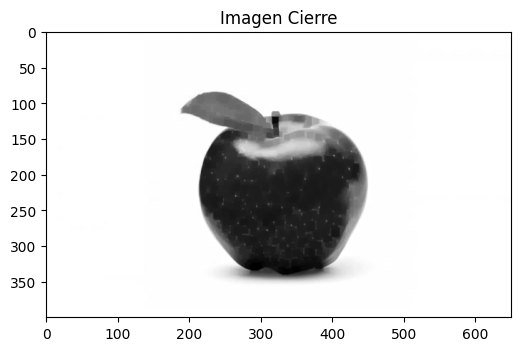

In [16]:
cierre = cv2.morphologyEx(img_gris, cv2.MORPH_CLOSE, kernel)

#GRAFICANDO
plt.figure(dpi=100)
plt.title('Imagen Cierre')
plt.imshow(cierre,cmap='gray')
plt.show()

## 3. Agregue al programa elaborado en los puntos 1 y 2, las siguientes funcionalidades: 

a) Leer una imagen en niveles de gris de disco duro y desplegarla en pantalla.

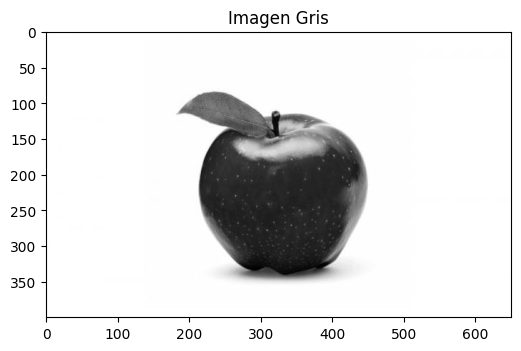

In [17]:
#Converción a gris
img_gris = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY) #Hacemos conversion de espacio de color a gris

#GRAFICANDO
plt.figure(dpi=100)
plt.title('Imagen Gris')
plt.imshow(img_gris,cmap='gray')
plt.show()

b) Binarizar esta imagen manualmente al elegir un umbral manualmente. Aplicar lo visto en el conjunto de láminas 5.
Mostar resultado en pantalla.

In [18]:
#Ensanchamiento de contraste
def contraste(img):
    x,y=img.shape
    a=0
    b=1
    c=np.amin(img)
    d=np.amax(img)
    z=np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            z[i,j]=(img[i,j]-c)*((b-a)/(d-c))+a
    return z

In [19]:
#Umbralado para binarizar la imagen
def umbral2(img,b):
    x,y=img.shape
    z=np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            if img[i,j]<b:
                z[i,j]=1
            else:
                z[i,j]=0    
    return z

In [20]:
#Histograma
def graficar(datos):
   
    plt.figure(1)
    x=range(len(datos))
    plt.xticks([0, 50, 100, 150, 200, 255],[0, 50, 100, 150, 200, 255])
    plt.bar(x, datos, align='center')
    plt.title('Histograma')   
    plt.xlabel('Valores de intensidad')
    plt.ylabel('Numero de pixeles')
    
    #plt.savefig(nombre_del_archivo, bbox_inches='tight')

    return None

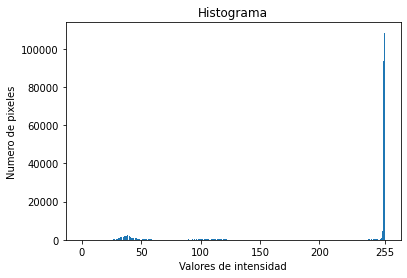

In [21]:
graficar(mzna.histogram())
plt.show()

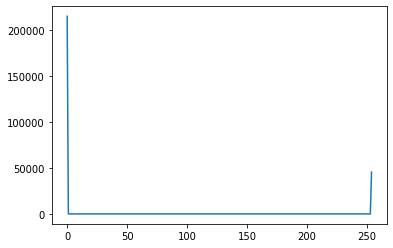

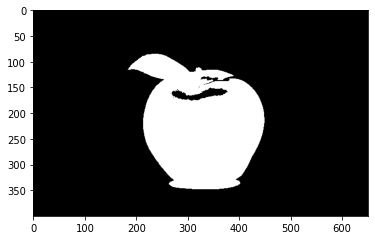

In [23]:
img3=contraste(img_gris)
img3=umbral2(img3,190/255)
histo,bins=np.histogram(np.asarray(img3).reshape(-1),bins=255)
plt.plot(histo)
plt.show()
plt.imshow(img3,cmap='gray')

c) Binarizar la imagen de entrada en forma automática mediante uno de los métodos expuestos. El programa debería poder seleccionar entre los siguientes métodos: Otsu, Kittler-Illinworth y Sahoo et al. Aplicar lo visto en el conjunto de láminas 5.
Mostar resultado en pantalla.


        1) otsu            2) Kittler-Illinworth
    3) Sahoo et al                4) salir
    
-Selecciona un metodo de binarización:3


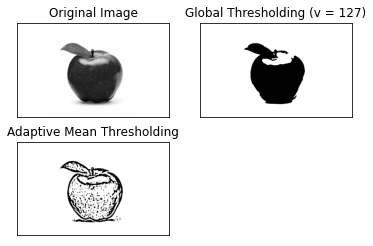


Has seleccionado el metodo de Sahoo et al...
pulsa una tecla para continuar2


In [27]:
#AYPV
print("""
        1) otsu            2) Kittler-Illinworth
    3) Sahoo et al                4) salir
    """)

# Leemos lo que ingresa el usuario
eligio=input("-Selecciona un metodo de binarización:")

# Según lo que ingresó, código diferente
if eligio=="1":
   import cv2
   img = cv2.imread('./recursos/manzana.jpg',0)
   ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
   ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
   blur = cv2.GaussianBlur(img,(5,5),0)
   ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
   images = [img, 0, th1, img, 0, th2, blur, 0, th3]
   titles = ['Imagen original con ruido','Histograma','Binarizacion global v=127)',
   'Imagen original con ruido','Histograma',"Binarización de Otsu",
   'Imagen filtrada gaussiana','Histograma',"Binarización de Otsu"]
   miArray = np.arange(3)
   for i in miArray:
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
   plt.show()
   print ("")
   input("Has seleccionado el metodo de Otsu...\npulsa una tecla para continuar")
elif eligio=="3":
   img1 = cv2.imread('./recursos/manzana.jpg',0)
   img2 = cv2.medianBlur(img1,5)
   ret,th1 = cv2.threshold(img2,127,255,cv2.THRESH_BINARY)
   th2 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
   titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding']
   images = [img, th1, th2]
   miArray = np.arange(3)
   for i in miArray:
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
   plt.show()
   print ("")
   input("Has seleccionado el metodo de Sahoo et al...\npulsa una tecla para continuar")
elif eligio=="2":
   img3 = cv2.imread('./recursos/manzana.jpg',0)
   img4 = cv2.medianBlur(img3,5)
   ret,th1 = cv2.threshold(img4,127,255,cv2.THRESH_BINARY)
   th2 = cv2.adaptiveThreshold(img4,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
   titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Gaussian Thresholding']
   images = [img, th1, th2]
   miArray = np.arange(3)
   for i in miArray:
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
   plt.xticks([]),plt.yticks([])
   plt.show()
   print ("")
   input("Has seleccionado el metodo de Kittler-Illinworth...\npulsa una tecla para continuar")
elif eligio=="4":
    input("introduzca una opcion valida...\npulsa una tecla para continuar")
else:
    print("Opción no válida")

d) Agregar ruido sal y pimienta o gaussiano a la imagen de entrada para poder apreciar cómo este factor influye en el proceso de umbralado de una imagen, según lo visto en el conjunto de láminas 5 del curso.
Se debe poder apreciar el resultado.
Aplicar lo visto en el conjunto de láminas 4.
Mostar resultado en pantalla.